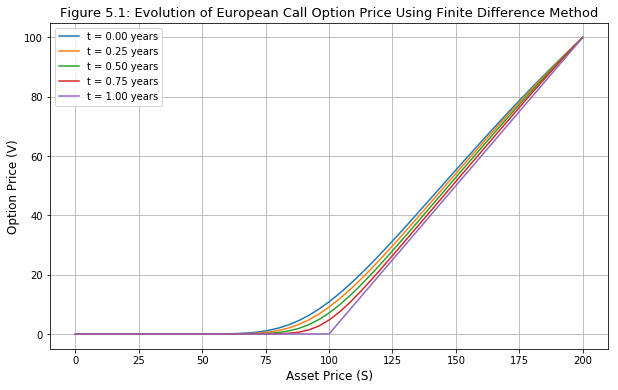

European Call Option Price using Black-Scholes at S=K: 10.45
European Call Option Price using Finite Difference at S=K: 10.85


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Finite Difference method for European Call Option with full solution history
def finite_difference_european_call_graph(S_max, K, T, r, sigma, M, N):
    S = np.linspace(0, S_max, M + 1)  # Asset price grid
    dt = T / N
    dS = S_max / M

    V = np.maximum(S - K, 0)  # Payoff at maturity
    V_history = np.zeros((M + 1, N + 1))
    V_history[:, N] = V

    # Finite difference coefficients (Explicit Scheme)
    alpha = 0.5 * dt * (sigma**2 * (S / dS)**2 - r * (S / dS))
    beta = 1 - dt * (sigma**2 * (S / dS)**2 + r)
    gamma = 0.5 * dt * (sigma**2 * (S / dS)**2 + r * (S / dS))

    # Apply boundary conditions
    V[0] = 0
    V[M] = max(S_max - K, 0)

    # Backward time-stepping
    for j in range(N - 1, -1, -1):
        for i in range(1, M):
            V[i] = alpha[i] * V[i - 1] + beta[i] * V[i] + gamma[i] * V[i + 1]
            if np.isnan(V[i]) or np.isinf(V[i]):
                V[i] = 0  # Safeguard

        V[0] = 0
        V[M] = max(S_max - K, 0)
        V_history[:, j] = V.copy()

    return S, V_history

# Black-Scholes formula for comparison
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Parameters
S_max = 200
K = 100
T = 1
r = 0.05
sigma = 0.2
M = 50
N = 200

# Compute solution
S, V_history = finite_difference_european_call_graph(S_max, K, T, r, sigma, M, N)

# Plot evolution at selected time levels
time_indices = [0, int(N / 4), int(N / 2), int(3 * N / 4), N]
plt.figure(figsize=(10, 6))

for j in time_indices:
    t = j * T / N
    plt.plot(S, V_history[:, j], label=f"t = {float(t):.2f} years")
   # plt.plot(S, V_history[:, j], label=f"t = {t:.2f} years")

plt.xlabel("Asset Price (S)", fontsize=12)
plt.ylabel("Option Price (V)", fontsize=12)
plt.title("Figure 5.1: Evolution of European Call Option Price Using Finite Difference Method", fontsize=13)
plt.legend()
plt.grid(True)

# Save the figure to the specified directory
save_path = r"F:\GITHUB\computational-finance-models\chart\Figure 5.1 - Finite Difference Method.png"
plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')

plt.show()

# Comparison to Black-Scholes at S = K
call_price_bs = black_scholes_call(K, K, T, r, sigma)
print(f"European Call Option Price using Black-Scholes at S=K: {call_price_bs:.2f}")

# Finite difference approximation at S=K
closest_index = np.abs(S - K).argmin()
print(f"European Call Option Price using Finite Difference at S=K: {V_history[closest_index, 0]:.2f}")
